In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data=pd.read_csv("/kaggle/input/test-results/test_data (1).csv")

In [3]:
data

,Unnamed: 0,datetime,open,high,low,close,volume,RSI_14,MACD_diff,ATR_14,...,Williams_%R_14,Awesome_Oscillator_5_34,PPO_Diff_12_26,PVO_Diff_12_26,Coefficient_of_Variance_30,Ulcer_Index_14,CMF_3_20,Ease_of_Movement,ADX_14,predictions
0,31701.0,2023-08-13 21:00:00,29411.9,29415.0,29351.5,29360.0,4436.755,42.712311,2.157654,33.349406,...,-70.163488,3.474412,0.013686,12.513581,0.092314,0.001857,-1099.049848,-0.546728,19.881411,29396.482725
1,31702.0,2023-08-13 22:00:00,29360.0,29367.3,29256.6,29307.0,13132.403,34.685640,-3.108060,38.874448,...,-75.581395,-6.966765,0.003490,21.171693,0.103878,0.002112,-2390.926689,-0.601026,21.381868,29285.993535
2,31703.0,2023-08-13 23:00:00,29307.0,29328.3,29282.3,29293.3,4427.205,32.961326,-7.045012,39.383416,...,-82.218992,-23.388529,-0.004816,20.812606,0.120076,0.002398,-3796.431215,-0.069096,22.775150,29191.288516
3,31704.0,2023-08-14 00:00:00,29293.3,29319.2,29232.0,29260.8,7929.206,29.246882,-11.126455,42.798887,...,-87.532468,-51.509118,-0.018221,18.265609,0.143096,0.002787,-5340.915366,-0.326620,24.693490,29159.720176
4,31705.0,2023-08-14 01:00:00,29260.7,29293.0,29187.0,29256.4,11149.943,28.774118,-13.265871,47.313252,...,-74.855072,-82.106471,-0.025941,18.218316,0.163036,0.003122,-4388.783471,-0.338441,26.923584,29128.151836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,35060.0,2023-12-31 20:00:00,42659.9,42724.5,42543.3,42599.1,4730.936,55.250041,6.105397,218.980878,...,-52.837838,238.756765,0.110297,5.447024,0.426422,0.004286,424.407203,-1.892074,18.219811,42639.401289
3360,35061.0,2023-12-31 21:00:00,42599.2,42717.0,42558.2,42558.9,3794.010,53.452662,-1.967177,214.682244,...,-68.789474,224.570882,0.033048,-13.301315,0.428925,0.004508,-1498.075834,0.154865,17.958618,42544.696270
3361,35062.0,2023-12-31 22:00:00,42559.0,42629.5,42111.9,42294.8,11952.346,43.451719,-24.605785,236.319226,...,-78.202836,167.812353,-0.053112,-8.804990,0.434054,0.005432,-3715.263365,-11.558186,18.169950,42544.696270
3362,35063.0,2023-12-31 23:00:00,42294.8,42380.1,42083.1,42314.0,11676.465,44.268101,-37.051723,240.653567,...,-68.666033,73.881765,-0.099686,-6.551760,0.436173,0.005949,-1918.881968,-3.538117,18.485201,42355.286230


In [4]:
test_data=data

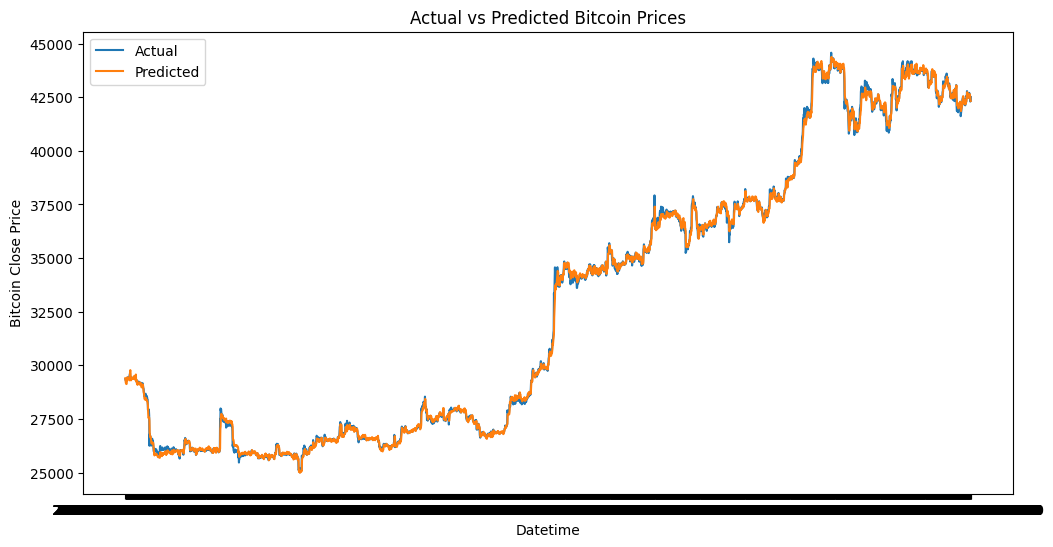

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['datetime'],test_data['close'], label="Actual")
plt.plot(test_data['datetime'], test_data['predictions'], label="Predicted")
plt.xlabel("Datetime")
plt.ylabel("Bitcoin Close Price")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

In [6]:
# Calculate the actual and predicted price changes
test_data['actual_change'] = test_data['close'].diff()
test_data['predicted_change'] = test_data['predictions'].diff()

# Determine if the trade was won (same direction of change)
test_data['won_trade'] = np.sign(test_data['actual_change']) == np.sign(test_data['predicted_change'])

# Calculate the win ratio
total_trades = test_data['won_trade'].count() - 1  # Exclude the first NaN row
won_trades = test_data['won_trade'].sum()
win_ratio = won_trades / total_trades if total_trades > 0 else 0

print(f"Win Ratio: {win_ratio:.2%}")

Win Ratio: 39.10%


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
# Calculate the actual price changes (standard difference)
test_data['actual_change'] = test_data['close'].diff()

# Calculate predicted change by subtracting the actual value of the previous row
test_data['predicted_change'] = test_data['predictions'] - test_data['close'].shift()

# Determine if the trade was won (same direction of change)
test_data['won_trade'] = np.sign(test_data['actual_change']) == np.sign(test_data['predicted_change'])

# Calculate the win ratio
total_trades = test_data['won_trade'].count() - 1  # Exclude the first NaN row
won_trades = test_data['won_trade'].sum()
win_ratio = won_trades / total_trades if total_trades > 0 else 0

print(f"Win Ratio: {win_ratio:.2%}")

Win Ratio: 51.50%


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
!git clone https://github.com/ztuntrade/untrade-sdk.git && cd untrade-sdk

Cloning into 'untrade-sdk'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 118 (delta 56), reused 95 (delta 36), pack-reused 0 (from 0)
Receiving objects: 100% (118/118), 43.67 KiB | 4.85 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [9]:
import os
os.chdir("untrade-sdk")

In [10]:
!pip install .

Processing /kaggle/working/untrade-sdk
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for untrade: filename=untrade-0.1.0-py3-none-any.whl size=5082 sha256=31197b3357f64b30ee36b40c8baf39aa49051fa7e417fb9f79f49806376b6a57
  Stored in directory: /root/.cache/pip/wheels/78/38/1b/d90e91a930cde98f08002408a18e115c94b1133e5955008800
Successfully built untrade


In [11]:
!pip install pandas_ta
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=6cba7208954bb9f5d85ae1b87dd3a28dc4606ddbe1a937e8df4a59a696e66fbe
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [12]:
import pandas_ta as ta
import time 
from tqdm import tqdm

In [13]:
help(ta.donchian)

Help on function donchian in module pandas_ta.volatility.donchian:

donchian(high, low, lower_length=None, upper_length=None, offset=None, **kwargs)
    Donchian Channels (DC)
    
    Donchian Channels are used to measure volatility, similar to
    Bollinger Bands and Keltner Channels.
    
    Sources:
        https://www.tradingview.com/wiki/Donchian_Channels_(DC)
    
    Calculation:
        Default Inputs:
            lower_length=upper_length=20
        LOWER = low.rolling(lower_length).min()
        UPPER = high.rolling(upper_length).max()
        MID = 0.5 * (LOWER + UPPER)
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        lower_length (int): The short period. Default: 20
        upper_length (int): The short period. Default: 20
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value, optional): Type

In [14]:
def strat(df):
            start_time = time.time()

            df['predicted_MA_Short']=df['predictions'].rolling(window=12).mean()
            df['predicted_MA_Long']=df['predictions'].rolling(window=26).mean()

            df['RSI']= ta.rsi(df['predictions'], length=14)


            df['Donchian_Lower'] = df['low'].rolling(window=20).min()  # Lower Band
            df['Donchian_Upper'] = df['high'].rolling(window=20).max()  # Upper Band

    
            bollinger = ta.bbands(df['close'], length=20, std=2)
            df['Bollinger_Lower'] = bollinger['BBL_20_2.0']  # Lower Band
            df['Bollinger_Upper'] = bollinger['BBU_20_2.0']  # Upper Band

            stop_loss_multiplier=7
    
                # Initialize signals
            df['signals'] = 0
            in_trade_long = False
            in_trade_short = False
            entry_price_long = 0
            entry_price_short = 0
            
            #signal generation 
            for i in range(len(df)):
                if in_trade_long:
                    # Calculate trailing stop-loss based on ATR
                    atr_value = df.loc[i,'ATR_14']
                    if(df.loc[i,'close']>df.loc[i-1,'close']):
                        stop_loss_price = max(df.loc[i,'close'] - (atr_value * stop_loss_multiplier),stop_loss_price)
                        
                    #exit long trade if stoploss is attained
                    if (df.loc[i,'close'] <= stop_loss_price or df.loc[i,'RSI_14']>=90):
                            df.at[i, 'signals'] = -1  # Exit long position
                            in_trade_long = False  # Reset the trade status
                            entry_price_long = 0  # Reset entry price
            
                elif in_trade_short:
                    # Calculate trailing stop-loss based on ATR
                    atr_value = df.loc[i,'ATR_14']
                    if(df.loc[i,'close']<df.loc[i-1,'close']):
                        stop_loss_price = min(df.loc[i,'close'] + (atr_value * stop_loss_multiplier),stop_loss_price)
    
                    #exit short trade if stoploss is attained
                    if (df.loc[i,'close'] >= stop_loss_price or df.loc[i,'RSI_14']<=10):
                            df.at[i, 'signals'] = -2  # Exit short position
                            in_trade_short = False  # Reset the trade status
                            entry_price_short = 0  # Reset entry price
    
                #entry condition for long trade based on XGBoost prediction combined MA crossover confirmation
                elif ( df.loc[i,'close']<df.loc[i,'Donchian_Upper'] and df.loc[i,'predicted_MA_Short']>df.loc[i,'predicted_MA_Long']):
                
                    df.at[i, 'signals'] = 1  # Long signal
                    entry_price_long = df.loc[i,'close']
                    in_trade_long = True
                    atr_value = df.loc[i,'ATR_14']
                    stop_loss_price = entry_price_long - (atr_value * stop_loss_multiplier)
                    
                #entry condition for short trade based on XGBoost prediction combined MA crossover confirmation 
                elif (df.loc[i,'close']>df.loc[i,'Bollinger_Lower'] and  df.loc[i,'predicted_MA_Short']<df.loc[i,'predicted_MA_Long']):
                    
                      df.at[i, 'signals'] = 2  # Short signal
                      entry_price_short = df.loc[i,'close']
                      in_trade_short = True
                      atr_value = df.loc[i,'ATR_14']
                      stop_loss_price = entry_price_short + (atr_value * stop_loss_multiplier)     
    
            df_1 = df.copy()
            long_open = False
            short_open = False
          
            #signal processing
            for index, row in df_1.iterrows():
                signal = row['signals']
    
                if signal == 2 and short_open:
                    df_1.at[index, 'signals'] = 0
                elif signal == 1 and long_open:
                    df_1.at[index, 'signals'] = 0
                elif signal == 1 and not long_open:
                    long_open = True
                elif signal == 2 and not short_open:
                    short_open = True
    
                elif signal == -1:
                    if long_open:
                        long_open = False
                    else:
                        df_1.at[index, 'signals'] = 0
                elif signal == -2:
                    if short_open:
                        short_open = False
                    else:
                        df_1.at[index, 'signals'] = 0
    
            df_1['signal'] = df_1['signals']
            

            for i in tqdm(range(len(df_1))):
                if df_1.loc[i,'signals'] == 2 :
                    df_1.loc[i,'signals'] = -1
                elif df_1.loc[i,'signals'] == -2 :
                    df_1.loc[i,'signals'] = 1

            
                
            df_1= df_1[df_1["signals"]!=0]
            
            df_1 = df_1.rename(columns={'timestamp': 'datetime'})
            df_1 = df_1.rename(columns={'signal': 'trade_type'})

            
            end_time = time.time()
            time_taken = end_time - start_time
            print(f"Time taken to generate signals : {time_taken:.2f}")
            
            return df_1

**BACKTESTING USING SDK**

In [15]:
from untrade.client import Client

# Initialize the client
client = Client()

In [16]:
def perform_backtest(csv_file_path):
    client = Client()

    # Perform backtest using the provided CSV file path
    result = client.backtest(
        jupyter_id="team53_zelta_hpps", 
        file_path=csv_file_path,
        leverage=1,
    )
    return result

In [17]:
def main():
    df=pd.read_csv("/kaggle/input/test-results/test_data (1).csv")
    # processed_data = process_data(df)
    result_data = strat(df)
    csv_file_path = "results.csv"
    result_data.to_csv('/kaggle/working/signal_file.csv', index=False)
    result_data.to_csv(csv_file_path, index=False)
    
    backtest_result = perform_backtest(csv_file_path)
    for value in backtest_result:
       print(value)

In [18]:
if __name__ == "__main__":
     main()  

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
100%|██████████| 3364/3364 [00:00<00:00, 51288.94it/s]


Time taken to generate signals : 0.42
data: {
  "jupyter_id": "team53-5fzelta-5fhpps",
  "result_type": "Main",
  "message": "Backtest completed",
  "result": {
    "static_statistics": {
      "From": "2023-08-14 22:00:00",
      "Total Trades": 18,
      "Leverage Applied": 1.0,
      "Winning Trades": 7,
      "Losing Trades": 11,
      "No. of Long Trades": 9,
      "No. of Short Trades": 9,
      "Benchmark Return(%)": 45.442713,
      "Benchmark Return(on $1000)": 454.427132,
      "Win Rate": 38.888889,
      "Winning Streak": 3,
      "Losing Streak": 4,
      "Gross Profit": 254.986834,
      "Net Profit": 227.986834,
      "Average Profit": 12.665935,
      "Maximum Drawdown(%)": 10.980886,
      "Average Drawdown(%)": 4.791479,
      "Largest Win": 329.974283,
      "Average Win": 77.805916,
      "Largest Loss": -63.134067,
      "Average Loss": -28.78678,
      "Maximum Holding Time": "29 days 18:0:0",
      "Average Holding Time": "7 days 7:53:20",
      "Maximum Adverse 